In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the appliances energy prediction data set

cols = ['date', 'Appliances', 'lights']

data = pd.read_csv('energydata_complete.csv', usecols=cols)

data.head()

,date,Appliances,lights
0,2016-01-11 17:00:00,60,30
1,2016-01-11 17:10:00,60,30
2,2016-01-11 17:20:00,50,30
3,2016-01-11 17:30:00,50,40
4,2016-01-11 17:40:00,60,40


In [3]:
data.shape

(19735, 3)

In [4]:
data.dtypes

date          object
Appliances     int64
lights         int64
dtype: object

Text(0, 0.5, 'Number of rows')

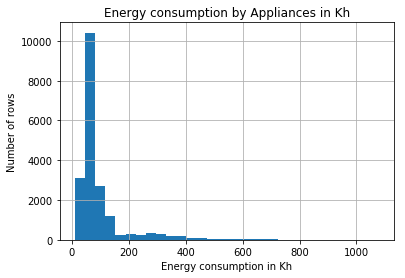

In [5]:
# Make histogram of electirivy consumption by appliances

data['Appliances'].hist(bins=30)
plt.title('Energy consumption by Appliances in Kh')
plt.xlabel('Energy consumption in Kh')
plt.ylabel('Number of rows')

Text(0, 0.5, 'Number of rows')

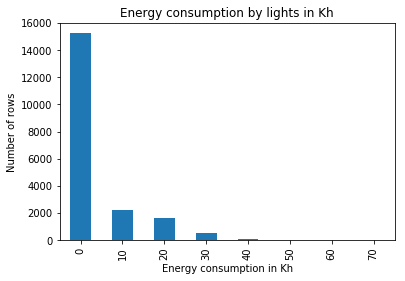

In [6]:
# Make histogram of electirivy consumption by lights

data['lights'].value_counts().plot.bar()
plt.title('Energy consumption by lights in Kh')
plt.xlabel('Energy consumption in Kh')
plt.ylabel('Number of rows')

In [7]:
# check maximun and minimum dates
data['date'].agg(['min', 'max'])

min    2016-01-11 17:00:00
max    2016-05-27 18:00:00
Name: date, dtype: object

In [8]:
# parse the date column as datetime data type

data['date'] = pd.to_datetime(data['date'])

Text(0.5, 1.0, 'Energy consumption by Appliances in time')

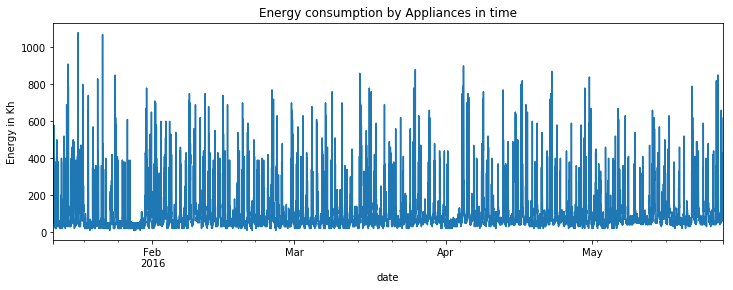

In [9]:
# plot consumption per timepoint by appliances

# I create a copy of the dataframe, not to alter the original dataframe structure
# which s the one I will use in the recipe in the book

tmp = data.copy()
tmp.index = tmp['date']

tmp['Appliances'].plot(figsize=(12, 4))
plt.ylabel('Energy in Kh')
plt.title('Energy consumption by Appliances in time')

Text(0.5, 1.0, 'Energy consumption by lights in time')

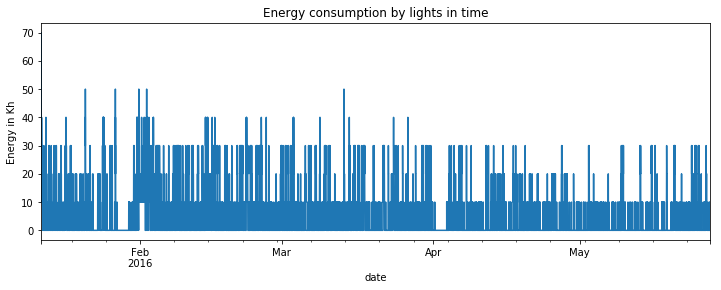

In [10]:
# plot consumption per timepoint by lights

tmp['lights'].plot(figsize=(12,4))
plt.ylabel('Energy in Kh')
plt.title('Energy consumption by lights in time')

## Determine statistical parameters per hr
### Single operation

In [11]:
# aggregate the data in 60 min views
# the value displayed by the features represents the average of
# the current and 5 precedent rows of data

data_rolled = data.rolling(window=6, on='date').mean()

data_rolled.head(10)

,date,Appliances,lights
0,2016-01-11 17:00:00,NaN,NaN
1,2016-01-11 17:10:00,NaN,NaN
2,2016-01-11 17:20:00,NaN,NaN
3,2016-01-11 17:30:00,NaN,NaN
4,2016-01-11 17:40:00,NaN,NaN
5,2016-01-11 17:50:00,55.000000,35.000000
6,2016-01-11 18:00:00,55.000000,38.333333
7,2016-01-11 18:10:00,55.000000,41.666667
8,2016-01-11 18:20:00,56.666667,43.333333
9,2016-01-11 18:30:00,60.000000,43.333333


In [12]:
# same as previous but with a different implementation of the window argument
# instead of averaging the previous 6 rows, now we indicate a time period
# pandas rolling will use the date variable to determine the periods

data_rolled = data.rolling(window='60min', on='date', min_periods=6).mean()

data_rolled.head(10)

,date,Appliances,lights
0,2016-01-11 17:00:00,NaN,NaN
1,2016-01-11 17:10:00,NaN,NaN
2,2016-01-11 17:20:00,NaN,NaN
3,2016-01-11 17:30:00,NaN,NaN
4,2016-01-11 17:40:00,NaN,NaN
5,2016-01-11 17:50:00,55.000000,35.000000
6,2016-01-11 18:00:00,55.000000,38.333333
7,2016-01-11 18:10:00,55.000000,41.666667
8,2016-01-11 18:20:00,56.666667,43.333333
9,2016-01-11 18:30:00,60.000000,43.333333


### Multiple built-in operations

In [13]:
# now let's create multiple summaries in for every 60 min window

# make a list of the operations we want to perform
operations = ['sum', 'max', 'min', 'mean', 'median', 'std']

In [14]:
# create a dictionary with the operations to apply to each variable
# in this example we will apply all operations to both variables

op_dict = {key: operations for key in ['Appliances', 'lights']}
op_dict

{'Appliances': ['sum', 'max', 'min', 'mean', 'median', 'std'],
 'lights': ['sum', 'max', 'min', 'mean', 'median', 'std']}

In [15]:
# create the aggregations

data_rolled = data.set_index('date').rolling(window='60min').agg(op_dict)

data_rolled.head(10)

Appliances                                         lights  \
                           sum   max   min       mean median       std    sum   
date                                                                            
2016-01-11 17:00:00       60.0  60.0  60.0  60.000000   60.0       NaN   30.0   
2016-01-11 17:10:00      120.0  60.0  60.0  60.000000   60.0  0.000000   60.0   
2016-01-11 17:20:00      170.0  60.0  50.0  56.666667   60.0  5.773503   90.0   
2016-01-11 17:30:00      220.0  60.0  50.0  55.000000   55.0  5.773503  130.0   
2016-01-11 17:40:00      280.0  60.0  50.0  56.000000   60.0  5.477226  170.0   
2016-01-11 17:50:00      330.0  60.0  50.0  55.000000   55.0  5.477226  210.0   
2016-01-11 18:00:00      330.0  60.0  50.0  55.000000   55.0  5.477226  230.0   
2016-01-11 18:10:00      330.0  60.0  50.0  55.000000   55.0  5.477226  250.0   
2016-01-11 18:20:00      340.0  60.0  50.0  56.666667   60.0  5.163978  260.0   
2016-01-11 18:30:00      360.0  70.0  50.0  60.000000   60.0  6.324555  260.0   

                                                             
                      max   min       mean median       std  
date                                                         
2016-01-11 17:00:00  30.0  30.0  30.000000   30.0       NaN  
2016-01-11 17:10:00  30.0  30.0  30.000000   30.0  0.000000  
2016-01-11 17:20:00  30.0  30.0  30.000000   30.0  0.000000  
2016-01-11 17:30:00  40.0  30.0  32.500000   30.0  5.000000  
2016-01-11 17:40:00  40.0  30.0  34.000000   30.0  5.477226  
2016-01-11 17:50:00  40.0  30.0  35.000000   35.0  5.477226  
2016-01-11 18:00:00  50.0  30.0  38.333333   40.0  7.527727  
2016-01-11 18:10:00  50.0  30.0  41.666667   40.0  7.527727  
2016-01-11 18:20:00  50.0  40.0  43.333333   40.0  5.163978  
2016-01-11 18:30:00  50.0  40.0  43.333333   40.0  5.163978

## There is more
### User defined operations

In [16]:
from scipy.signal import find_peaks

In [17]:
def find_no_peaks(x):
    peaks, _ = find_peaks(x)
    return len(peaks)

def find_no_valleys(x):
    valleys, _ = find_peaks(1/x)
    return len(valleys)

In [18]:
# calculate number of local minima and maxima per day
# ==> more or less 144 time intervals represent 24 hs

data_rolled = data.set_index('date').rolling(window=144).agg([find_no_peaks, find_no_valleys])

In [19]:
for row in range(144, 1440, 144):
    print(data_rolled.iloc[[row]])

                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                                                              
2016-01-12 17:00:00          25.0            26.0          14.0   

                                     
                    find_no_valleys  
date                                 
2016-01-12 17:00:00            13.0  
                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                                                              
2016-01-13 17:00:00          33.0            32.0          11.0   

                                     
                    find_no_valleys  
date                                 
2016-01-13 17:00:00            10.0  
                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                    

In [20]:
# alternative implementation specifically indicating 1 day 
# in the window argument

data_rolled = data.set_index('date').rolling(window='1d').agg([find_no_peaks, find_no_valleys])

In [21]:
for row in range(144, 1440, 144):
    print(data_rolled.iloc[[row]])

                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                                                              
2016-01-12 17:00:00          25.0            26.0          14.0   

                                     
                    find_no_valleys  
date                                 
2016-01-12 17:00:00            13.0  
                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                                                              
2016-01-13 17:00:00          33.0            32.0          11.0   

                                     
                    find_no_valleys  
date                                 
2016-01-13 17:00:00            10.0  
                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                    

In [25]:
# determine the percentage change in value between consecutive observations

data_rolled = data.set_index('date')[['Appliances', 'lights']].pct_change()

data_rolled.head(10)

,Appliances,lights
date,,
2016-01-11 17:00:00,NaN,NaN
2016-01-11 17:10:00,0.000000,0.000000
2016-01-11 17:20:00,-0.166667,0.000000
2016-01-11 17:30:00,0.000000,0.333333
2016-01-11 17:40:00,0.200000,0.000000
2016-01-11 17:50:00,-0.166667,0.000000
2016-01-11 18:00:00,0.200000,0.250000
2016-01-11 18:10:00,0.000000,0.000000
2016-01-11 18:20:00,0.000000,-0.200000
